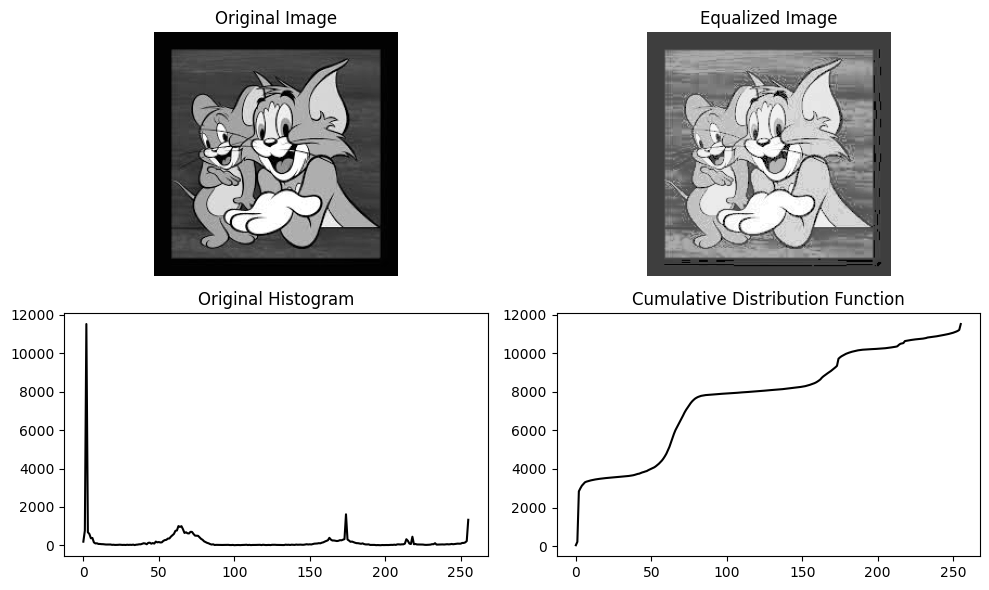

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function for Histogram Equalization
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Compute CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Normalize CDF
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Apply equalization
    equalized_image = cdf[image]

    return equalized_image, hist, cdf_normalized

# Load Image Using PIL (instead of OpenCV)
image_path = "download.jpeg"
img = Image.open(image_path).convert("L")  # Convert to grayscale
img = np.array(img)

# Apply Histogram Equalization
equalized_img, hist, cdf_normalized = histogram_equalization(img)

# Display Results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap="gray")
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.plot(hist, color="black")
plt.title("Original Histogram")

plt.subplot(2, 2, 4)
plt.plot(cdf_normalized, color="black")
plt.title("Cumulative Distribution Function")

plt.tight_layout()
plt.show()
